In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

In [2]:
def expser(n,x,e=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# e - relative error in computation of the series terms, modeled by uniform noise
    x=float(x)
    b=1.
    y=b
    for i in range(1,n+1):
        b*=x/i
        r=2*e*random()-e
        y+=b*(1+r)
    return y

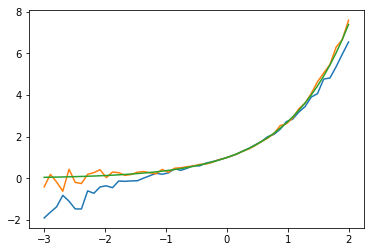

In [3]:
x = np.linspace(-3, 2, 50)
y = []
for xx in x: 
    y.append(expser(3,xx,.1))
plt.plot(x,y)
y = []
for xx in x: 
    y.append(expser(16,xx,.1))
plt.plot(x,y)
y = []
for xx in x: 
    y.append(np.exp(xx))
plt.plot(x,y)

plt.show()

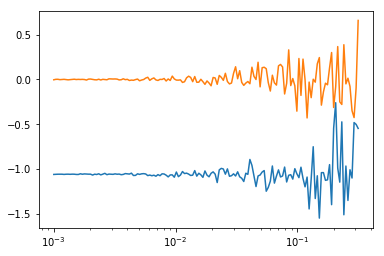

In [4]:
e = np.logspace(-3, -.5, 150)
y = []
for ee in e: 
    y.append(expser(3,2,ee)-np.exp(2))
plt.plot(e,y)
plt.xscale('log')
#plt.yscale('log')

y = []
for ee in e: 
    y.append(expser(16,2,ee)-np.exp(2))
plt.plot(e,y)
plt.xscale('log')
#plt.yscale('log')

plt.show()